# Red Dead Redemption 2 ÌÅ¨Î°§ÎßÅ

1. Í≤åÏûÑ Ï†ÑÏ≤¥ Î¶¨Î∑∞
    - ÏàòÏßë ÎåÄÏÉÅ
        - ÎãâÎÑ§ÏûÑ, ÏûëÏÑ±Ïùº, Î≥∏Î¨∏, Ï∂îÏ≤ú Ïó¨Î∂Ä, ÌîåÎ†àÏù¥ ÏãúÍ∞Ñ
    - Ïä§ÌÅ¨Î°§ ÎÇ¥Î¶¨Î©¥ÏÑú Î¶¨Î∑∞ Ìïú Í∞ú ÏÑπÏÖò Îã®ÏúÑÎ°ú ÌååÏã±
    - Ï§ëÎ≥µÎêú ÎåìÍ∏Ä Î∞òÎ≥µ Ïãú Ï¢ÖÎ£å
    - 500Í∞úÎßàÎã§ Ï§ëÍ∞ÑÏ†ÄÏû•
    
2. Ïä§ÌåÄ Îâ¥Ïä§ ÏóÖÎç∞Ïù¥Ìä∏ ÏàòÏßë
    - ÏàòÏßë ÎåÄÏÉÅ
        - ÏóÖÎç∞Ïù¥Ìä∏ ÌéòÏù¥ÏßÄÏóêÏÑú Í∞Å ÏÑ∏Î∂Ä ÌéòÏù¥ÏßÄ Í≤ΩÎ°ú ÏàòÏßë
        - Ïù¥ÌõÑ Ï†úÎ™©, Í≤åÏãúÏùº, Ïú†Ìòï, Î≥∏Î¨∏, Ï¢ãÏïÑÏöî Ïàò, ÎåìÍ∏Ä Ï£ºÏÜå ÏàòÏßë

## 1. Í≤åÏûÑ Ï†ÑÏ≤¥ Î¶¨Î∑∞

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd

# ÏÖÄÎ†àÎãàÏõÄ ÏÑ§Ï†ï
options = Options()
options.add_argument("--start-maximized")
options.add_experimental_option("detach", True)

driver = webdriver.Chrome(options=options)

# URL ÏßÑÏûÖ
url = "https://steamcommunity.com/app/1174180/reviews/?p=1&browsefilter=trendthreemonths&filterLanguage=all"
driver.get(url)
time.sleep(3)

SCROLL_PAUSE = 2
results = []
last_height = driver.execute_script("return document.body.scrollHeight")
last_seen_content = None
seen_repeat_count = 0

save_interval = 500
save_count = 1

while True:
    # Î¶¨Î∑∞ Ïπ¥Îìú ÏàòÏßë
    cards = driver.find_elements(By.CLASS_NAME, "apphub_Card")

    for card in cards[len(results):]:
        try:
            nickname_link = card.find_element(By.CSS_SELECTOR, ".apphub_friend_block_container a").get_attribute("href")
        except:
            nickname_link = None

        try:
            date = card.find_element(By.CLASS_NAME, "date_posted").text.replace("Í≤åÏãú ÏùºÏãú: ", "").strip()
        except:
            date = None

        try:
            content = card.find_element(By.CLASS_NAME, "apphub_CardTextContent").text.strip()
        except:
            content = None

        try:
            recommendation = card.find_element(By.CLASS_NAME, "title").text.strip()
        except:
            recommendation = None

        try:
            playtime = card.find_element(By.CLASS_NAME, "hours").text.strip()
        except:
            playtime = None

        # Ï¢ÖÎ£å Ï°∞Í±¥: ÎèôÏùº ÎåìÍ∏Ä Î∞òÎ≥µ Í∞êÏßÄ
        if content == last_seen_content:
            seen_repeat_count += 1
            if seen_repeat_count >= 3:
                print("\nÎèôÏùº ÎåìÍ∏Ä 3Ìöå Î∞òÎ≥µ Í∞êÏßÄ. ÌÅ¨Î°§ÎßÅ Ï¢ÖÎ£å.")
                break
        else:
            seen_repeat_count = 0
            last_seen_content = content

        row = {
            "ÎãâÎÑ§ÏûÑ": nickname_link,
            "ÏûëÏÑ±Ïùº": date,
            "Î≥∏Î¨∏": content,
            "Ï∂îÏ≤ú Ïó¨Î∂Ä": recommendation,
            "ÌîåÎ†àÏù¥ ÏãúÍ∞Ñ": playtime
        }
        results.append(row)

        # Ïã§ÏãúÍ∞Ñ Ï∂úÎ†•
        print(f"\nÎãâÎÑ§ÏûÑ: {nickname_link}")
        print(f"ÏûëÏÑ±Ïùº: {date}")
        print(f"Ï∂îÏ≤úÏó¨Î∂Ä: {recommendation}")
        print(f"ÌîåÎ†àÏù¥ ÏãúÍ∞Ñ: {playtime}")
        print(f"Î≥∏Î¨∏: {content[:100]}{'...' if content and len(content) > 100 else ''}")

        # Ï§ëÍ∞Ñ Ï†ÄÏû•
        if len(results) % save_interval == 0:
            temp_df = pd.DataFrame(results)
            temp_df.to_csv(f"RDR2_reviews_temp_{save_count}.csv", index=False, encoding="utf-8-sig")
            print(f"\n Ï§ëÍ∞Ñ Ï†ÄÏû• ÏôÑÎ£å: RDR2_reviews_temp_{save_count}.csv ({len(results)}Í∞ú)")
            save_count += 1

    # Ï§ëÎ≥µ Ï¢ÖÎ£å Ï≤òÎ¶¨
    if seen_repeat_count >= 3:
        break

    # Ïä§ÌÅ¨Î°§ Îã§Ïö¥
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)  # Ïä§ÌÅ¨Î°§ ÌõÑ 3Ï¥à ÎåÄÍ∏∞

    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        print("\nÎçî Ïù¥ÏÉÅ Î°úÎìúÌï† ÎÇ¥Ïö© ÏóÜÏùå. Ï¢ÖÎ£åÌï©ÎãàÎã§.")
        break
    last_height = new_height


# ÏµúÏ¢Ö Ï†ÄÏû•
df = pd.DataFrame(results)
df.to_csv("31-0. RDR2_reviews.csv", index=False, encoding="utf-8-sig")
print(f"\n ÌÅ¨Î°§ÎßÅ ÏôÑÎ£å! Ï¥ù Î¶¨Î∑∞ Ïàò: {len(df)}Í∞ú")
print("Ï†ÄÏû• ÏôÑÎ£å: 31-0. RDR2_reviews.csv")

## 2. Ïä§ÌåÄ Îâ¥Ïä§ ÏóÖÎç∞Ïù¥Ìä∏ ÏàòÏßë

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd

# ‚ñ∂ URL ÏÑ§Ï†ï
url = "https://store.steampowered.com/news/app/1174180?updates=true"

# ‚ñ∂ ÎìúÎùºÏù¥Î≤Ñ ÏÑ§Ï†ï
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# ‚ñ∂ ÌéòÏù¥ÏßÄ Ïó¥Í∏∞
driver.get(url)
time.sleep(3)

# ‚ñ∂ ÏàòÏßëÏö© set
collected_urls = set()
results = []

# ‚ñ∂ Ï≤úÏ≤úÌûà Ïä§ÌÅ¨Î°§ÌïòÎ©∞ ÏàòÏßë
scroll_count = 0
max_scrolls = 50
no_new_count = 0

while scroll_count < max_scrolls and no_new_count < 3:
    soup = BeautifulSoup(driver.page_source, "html.parser")

    news_blocks = soup.find_all("div", class_="_398u23KF15gxmeH741ZSyL")

    found_this_round = 0

    for block in news_blocks:
        a_tag = block.find("a", class_="Focusable")
        if a_tag:
            href = a_tag.get("href")
            if href and href not in collected_urls:
                full_url = "https://store.steampowered.com" + href
                collected_urls.add(href)
                results.append({"ÎßÅÌÅ¨": full_url})
                print(f"üìù [{len(results)}] {full_url}")
                found_this_round += 1

    if found_this_round == 0:
        no_new_count += 1
    else:
        no_new_count = 0

    # Ïä§ÌÅ¨Î°§ Îã§Ïö¥
    driver.execute_script("window.scrollBy(0, 1500);")
    scroll_count += 1
    time.sleep(2.5)

# ‚ñ∂ Ï†ÄÏû•
updatelink_df = pd.DataFrame(results)
updatelink_df['ÎßÅÌÅ¨'] = updatelink_df["ÎßÅÌÅ¨"].str.extract(r"(\/view\/\d+)")
updatelink_df.to_csv("31-1. RDR2_links.csv", index=False, encoding="utf-8-sig")
print(f"\n‚úÖ Ï¥ù {len(updatelink_df)}Í∞ú Îâ¥Ïä§ ÎßÅÌÅ¨ Ï†ÄÏû• ÏôÑÎ£å ‚Üí 31-1. RDR2_links.csv.csv")

driver.quit()


üìù [1] https://store.steampowered.com/news/app/1174180/view/2718437657217765528
üìù [2] https://store.steampowered.com/news/app/1174180/view/1718616979105906559
üìù [3] https://store.steampowered.com/news/app/1174180/view/501708794524337021
üìù [4] https://store.steampowered.com/news/app/1174180/view/501706257131899192
üìù [5] https://store.steampowered.com/news/app/1174180/view/501703086540064072
üìù [6] https://store.steampowered.com/news/app/1174180/view/501701175839555750
üìù [7] https://store.steampowered.com/news/app/1174180/view/501697399294525975
üìù [8] https://store.steampowered.com/news/app/1174180/view/501695476544831777
üìù [9] https://store.steampowered.com/news/app/1174180/view/532092880811983031
üìù [10] https://store.steampowered.com/news/app/1174180/view/514075305730637899
üìù [11] https://store.steampowered.com/news/app/1174180/view/514072769031307365
üìù [12] https://store.steampowered.com/news/app/1174180/view/4447961335474421776
üìù [13] https://stor

In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# ‚ñ∂ ÎìúÎùºÏù¥Î≤Ñ ÏÑ∏ÌåÖ
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# ‚ñ∂ URL Î≤†Ïù¥Ïä§
base_url = "https://store.steampowered.com/news/app/1174180"

# ‚ñ∂ update_df["ÎßÅÌÅ¨"]Ïóê '/view/Ïà´Ïûê' ÌòïÌÉúÍ∞Ä Îì§Ïñ¥ÏûàÎã§Í≥† Í∞ÄÏ†ï
# ÏòàÏãúÏö© (Ïã§Ï†úÏóêÎäî update_df = pd.read_csv(...)Î°ú Î∂àÎü¨ÏôÄÏïº Ìï®)
# update_df = pd.read_csv("steam_news_links_stable.csv")
# update_df["ÎßÅÌÅ¨"] = update_df["ÎßÅÌÅ¨"].str.extract(r"(\/view\/\d+)")

results = []

for i, update_link in enumerate(updatelink_df["ÎßÅÌÅ¨"], 1):
    full_url = base_url + update_link
    print(f"\nüåê [{i}] ÌÅ¨Î°§ÎßÅ Ï§ë: {full_url}")

    try:
        driver.get(full_url)
        time.sleep(3)
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # ‚úÖ Ï†úÎ™©
        title_tag = soup.select_one("div._3z2NYCkFizMu4fMvWTIBUG div.TqEPC9bhvVpZ1rb3Z8Mbd")
        title = title_tag.text.strip() if title_tag else ""

        # ‚úÖ Í≤åÏãúÏùº
        date_tag = soup.select_one("div._3IxVZE9uydjh3cA9kmtnk7 div._2KsEbGy9kiSDeQpcqEc9DG div._1Maw_Rw6sOKYC1KkOI1xM")
        date = date_tag.text.strip() if date_tag else ""

        # ‚úÖ Ïú†Ìòï
        type_tag = soup.select_one("div._3phfIcOe_STA7hSoFfIxlE")
        type_text = type_tag.text.strip() if type_tag else ""

        # ‚úÖ Î≥∏Î¨∏
        body_tag = soup.select_one("div.EventDetailsBody.A_A2B6fTn_MPLlGCmsLtd")
        body = body_tag.text.strip() if body_tag else ""

        # ‚úÖ Ï¢ãÏïÑÏöî Ïàò
        like_tag = soup.select_one("div._9x4Z7eMgdwfAVMr16ZaJ0 div._3Kelh1-_v6xHfRjF68n7NB div._3csl-MPe-hKuT8hQpOqEG5")
        likes = like_tag.text.strip() if like_tag else ""

        # ‚úÖ ÌÜ†Î°† Ï£ºÏÜå
        comment_tag = soup.select_one("div._16xC0mtOWoLbvSQbmo_ycv a.Focusable")
        comment_link = comment_tag["href"] if comment_tag else ""

        # ‚ñ∂ Ï†ÄÏû•
        results.append({
            "ÎßÅÌÅ¨": full_url,
            "Ï†úÎ™©": title,
            "Í≤åÏãúÏùº": date,
            "Ïú†Ìòï": type_text,
            "Î≥∏Î¨∏": body,
            "Ï¢ãÏïÑÏöî": likes,
            "ÎåìÍ∏Ä Ï£ºÏÜå": comment_link
        })

        print(f"üìù Ï†úÎ™©: {title} | Í≤åÏãúÏùº: {date} | Ï¢ãÏïÑÏöî: {likes} | Î≥∏Î¨∏: {body[:20]}")

    except Exception as e:
        print(f"‚ùå [{i}] Ïò§Î•ò Î∞úÏÉù: {e}")
        continue

driver.quit()

# ‚ñ∂ DataFrame Ï†ÄÏû•
update_df = pd.DataFrame(results)
update_df.to_csv("31-2. RDR2_update_details.csv", index=False, encoding="utf-8-sig")
print(f"\n‚úÖ Ï¥ù {len(update_df)}Í∞ú Îâ¥Ïä§ ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Ï†ÄÏû• ÏôÑÎ£å ‚Üí 31-2. RDR2_update_details.csv")


üåê [1] ÌÅ¨Î°§ÎßÅ Ï§ë: https://store.steampowered.com/news/app/1174180/view/2718437657217765528
üìù Ï†úÎ™©: Red Dead Online: The Naturalist Now Available | Í≤åÏãúÏùº: Posted¬†Wed, July 29, 2020 @9:15 AM¬†KST | Ï¢ãÏïÑÏöî: 12,256 | Î≥∏Î¨∏: Track, hunt and stud

üåê [2] ÌÅ¨Î°§ÎßÅ Ï§ë: https://store.steampowered.com/news/app/1174180/view/1718616979105906559
üìù Ï†úÎ™©: Red Dead Online: Moonshiners | Í≤åÏãúÏùº: Posted¬†Sat, December 14, 2019 @4:56 AM¬†KST | Ï¢ãÏïÑÏöî: 7,133 | Î≥∏Î¨∏: Peddle white lightni

üåê [3] ÌÅ¨Î°§ÎßÅ Ï§ë: https://store.steampowered.com/news/app/1174180/view/501708794524337021
üìù Ï†úÎ™©: Discover Rare Collectibles in Red Dead Online and Unearth Bonuses | Í≤åÏãúÏùº: StartedTue, September 2, 2025¬†11:19 PM¬†KST | Ï¢ãÏïÑÏöî: 2,285 | Î≥∏Î¨∏: The peaks and valley

üåê [4] ÌÅ¨Î°§ÎßÅ Ï§ë: https://store.steampowered.com/news/app/1174180/view/501706257131899192
üìù Ï†úÎ™©: Deliver Justice as a Bounty Hunter to Earn Bonuses and Discounts | Í≤åÏãúÏùº: Past Event Started

# Ï†ïÏ†ú

In [1]:
import pandas as pd

### Ïù∏Ïä§ÌÉÄ

In [2]:
ds_insta = pd.read_csv('30-3. destiny2_instagram_crawled.csv', encoding='utf-8-sig')

In [5]:
ds_insta = ds_insta.sort_values(by='Í≤åÏãúÏùº', ascending=True)

In [8]:
ds_insta['Ï¢ãÏïÑÏöî Ïàò'] = ds_insta['Ï¢ãÏïÑÏöî Ïàò'].str.replace('Ï¢ãÏïÑÏöî', '', regex=False).str.strip()

In [10]:
ds_insta['Ï¢ãÏïÑÏöî Ïàò'] = ds_insta['Ï¢ãÏïÑÏöî Ïàò'].str.replace('Í∞ú', '', regex=False).str.strip()

In [12]:
def convert_likes(val):
    if pd.isna(val):
        return None
    val = str(val).strip()
    if 'Îßå' in val:
        num = float(val.replace('Îßå', ''))
        return int(num * 10000)
    return int(val.replace(',', ''))

In [13]:
ds_insta['Ï¢ãÏïÑÏöî Ïàò'] = ds_insta['Ï¢ãÏïÑÏöî Ïàò'].apply(convert_likes)

In [45]:
ds_insta.to_csv('30-3-1. destiny2_instagram_Ï†ïÏ†ú.csv', index=False, encoding="utf-8-sig")

---

### Ïú†ÌäúÎ∏å

In [18]:
ds_yt = pd.read_csv('30-4. destiny2_youtube_crawled.csv', encoding='utf-8-sig')

In [20]:
ds_yt.head()

Ï†úÎ™©  \
0  Destiny 2: The Edge of Fate | Shooting Range H...   
1  Destiny 2: The Edge of Fate Original Soundtrac...   
2  Destiny 2: The Edge of Fate Original Soundtrac...   
3  Destiny 2: The Edge of Fate Original Soundtrac...   
4  Destiny 2: The Edge of Fate Original Soundtrac...   

                                                 URL        Ï°∞ÌöåÏàò    Í≤åÏãúÏùº  
0        https://www.youtube.com/watch?v=fl8l_D5gELk  Ï°∞ÌöåÏàò 1.8ÎßåÌöå  1Í∞úÏõî Ï†Ñ  
1        https://www.youtube.com/watch?v=wvr5e-cBxyo  Ï°∞ÌöåÏàò 4.3Ï≤úÌöå  1Í∞úÏõî Ï†Ñ  
2        https://www.youtube.com/watch?v=ujvkFYMUu4E  Ï°∞ÌöåÏàò 4.5Ï≤úÌöå  1Í∞úÏõî Ï†Ñ  
3  https://www.youtube.com/watch?v=skLNpqcLkck&pp...  Ï°∞ÌöåÏàò 5.4Ï≤úÌöå  1Í∞úÏõî Ï†Ñ  
4        https://www.youtube.com/watch?v=sV0B7WJiBg0  Ï°∞ÌöåÏàò 2.5Ï≤úÌöå  1Í∞úÏõî Ï†Ñ

In [22]:
ds_yt = ds_yt[~ds_yt['Ï†úÎ™©'].str.contains('soundtrack', case=False, na=False)]

In [24]:
ds_yt = ds_yt[ds_yt['Ï†úÎ™©'].str.contains('Îç∞Ïä§Ìã∞Îãà Í∞ÄÎîîÏñ∏Ï¶à', case=False, na=False)]

In [26]:
ds_yt.head()

Ï†úÎ™©  \
22                 Îç∞Ïä§Ìã∞Îãà Í∞ÄÎîîÏñ∏Ï¶à: Ïù¥Îã® | Í∏∏ÏùÑ Îî∞ÎùºÍ∞ÄÎã§ ÏãúÎÑ§ÎßàÌã±   
26       Îç∞Ïä§Ìã∞Îãà Í∞ÄÎîîÏñ∏Ï¶à: Ïö¥Î™ÖÏùò Í≤ΩÍ≥Ñ Í∞úÎ∞úÏûê ÏÉùÍ∞Å | ÌÜµÏ†úÍ∂å Ïû•ÏïÖ [KO]   
39  Îç∞Ïä§Ìã∞Îãà Í∞ÄÎîîÏñ∏Ï¶à: Ïö¥Î™ÖÏùò Í≤ΩÍ≥Ñ | Í∞úÎ∞úÏûê ÎùºÏù¥Î∏å Ïä§Ìä∏Î¶¨Î∞ç II ÏöîÏïΩ [KO]   
62             Îç∞Ïä§Ìã∞Îãà Í∞ÄÎîîÏñ∏Ï¶à: Ïö¥Î™ÖÏùò Í≤ΩÍ≥Ñ | Ï∂úÏãú Ìä∏Î†àÏùºÎü¨ [KO]   
67    Îç∞Ïä§Ìã∞Îãà Í∞ÄÎîîÏñ∏Ï¶à: Ïö¥Î™ÖÏùò Í≤ΩÍ≥Ñ Í∞úÎ∞úÏûê ÏÉùÍ∞Å | ÏºÄÌîåÎü¨Ïùò ÎØ∏Ïä§ÌÑ∞Î¶¨ [KO]   

                                            URL        Ï°∞ÌöåÏàò    Í≤åÏãúÏùº  
22  https://www.youtube.com/watch?v=Pjcdp6QohWg   Ï°∞ÌöåÏàò 11ÎßåÌöå  1Í∞úÏõî Ï†Ñ  
26  https://www.youtube.com/watch?v=x9qeEL8PVLU    Ï°∞ÌöåÏàò 1Ï≤úÌöå  1Í∞úÏõî Ï†Ñ  
39  https://www.youtube.com/watch?v=v912v6xi38M  Ï°∞ÌöåÏàò 1.1Ï≤úÌöå  1Í∞úÏõî Ï†Ñ  
62  https://www.youtube.com/watch?v=6zfm4hFjj9M  Ï°∞ÌöåÏàò 6.3Ï≤úÌöå  1Í∞úÏõî Ï†Ñ  
67  https://www.youtube.com/watch?v=knxyn_Kn0Yg   Ï°∞ÌöåÏàò 517Ìöå  1Í∞úÏõî Ï†Ñ

In [31]:
ds_yt['Ï°∞ÌöåÏàò'] = ds_yt['Ï°∞ÌöåÏàò'].str.replace('Ï°∞ÌöåÏàò', '', regex=False).str.strip()

In [33]:
ds_yt['Ï°∞ÌöåÏàò'] = ds_yt['Ï°∞ÌöåÏàò'].str.replace('Ìöå', '', regex=False).str.strip()

In [37]:
def convert_view(val):
    if pd.isna(val):
        return None
    val = str(val).strip()
    if 'Îßå' in val:
        num = float(val.replace('Îßå', ''))
        return int(num * 10000)
    if 'Ï≤ú' in val:
        num = float(val.replace('Ï≤ú', ''))
        return int(num * 1000)
    return int(val.replace(',', ''))

In [38]:
ds_yt['Ï°∞ÌöåÏàò'] = ds_yt['Ï°∞ÌöåÏàò'].apply(convert_view)

In [ ]:
from datetime import datetime, timedelta
import re

def convert_relative_date(val):
    if pd.isna(val):
        return None
    
    # 'Ï¢ãÏïÑÏöî' Ï†úÍ±∞ Î∞è Í≥µÎ∞± Ï†ïÎ¶¨
    val = str(val).replace('Ï¢ãÏïÑÏöî', '').strip()
    
    today = datetime.today()
    
    # 'Í∞úÏõî Ï†Ñ'
    m = re.match(r'(\d+)\s*Í∞úÏõî\s*Ï†Ñ', val)
    if m:
        months = int(m.group(1))
        # Ïõî Îã®ÏúÑ Í≥ÑÏÇ∞ (Îã®ÏàúÌûà 30ÏùºÎ°ú ÌôòÏÇ∞)
        return (today - timedelta(days=months * 30)).strftime('%Y-%m-%d')
    
    # 'Ïùº Ï†Ñ'
    d = re.match(r'(\d+)\s*Ïùº\s*Ï†Ñ', val)
    if d:
        days = int(d.group(1))
        return (today - timedelta(days=days)).strftime('%Y-%m-%d')
    
    # 'ÏãúÍ∞Ñ Ï†Ñ'
    h = re.match(r'(\d+)\s*ÏãúÍ∞Ñ\s*Ï†Ñ', val)
    if h:
        hours = int(h.group(1))
        return (today - timedelta(hours=hours)).strftime('%Y-%m-%d')
    
    # Ïù¥ÎØ∏ ÎÇ†Ïßú ÌòïÌÉúÏù∏ Í≤ΩÏö∞
    try:
        return pd.to_datetime(val).strftime('%Y-%m-%d')
    except:
        return val

# Ï†ÅÏö©
ds_yt['Í≤åÏãúÏùº'] = ds_yt['Í≤åÏãúÏùº'].apply(convert_relative_date)

In [44]:
ds_yt.to_csv('30-4-1. destiny2_youtube_Ï†ïÏ†ú.csv', index=False, encoding="utf-8-sig")

---

### ÌÜµÎ¶¨Î∑∞

In [46]:
ds_reviews = pd.read_csv('30-0. destiny2_reviews.csv', encoding="utf-8-sig")

In [48]:
ds_reviews["ÎãâÎÑ§ÏûÑ"] = ds_reviews["ÎãâÎÑ§ÏûÑ"].str.replace("https://steamcommunity.com/", "", regex=False)

In [49]:
ds_reviews["ÏûëÏÑ±Ïùº"] = ds_reviews["ÏûëÏÑ±Ïùº"].str.replace("Posted: ", "", regex=False)

In [50]:
import re

ds_reviews["ÎãâÎÑ§ÏûÑ"] = ds_reviews["ÎãâÎÑ§ÏûÑ"].str.extract(r'(?:id/|profiles/)([^/]+)')

In [51]:
ds_reviews["Î≥∏Î¨∏"] = ds_reviews["Î≥∏Î¨∏"].str.replace(r'^Posted:.*?\n', '', regex=True)

In [ ]:
ds_reviews

In [54]:
ds_reviews['ÏûëÏÑ±Ïùº'] = pd.to_datetime(ds_reviews['ÏûëÏÑ±Ïùº'] + ' 2025', errors='coerce').dt.strftime('%Y-%m-%d')

In [56]:
ds_reviews['Ï∂îÏ≤ú Ïó¨Î∂Ä'] = ds_reviews['Ï∂îÏ≤ú Ïó¨Î∂Ä'].replace({'Not Recommended': 0, 'Recommended': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_3468\3299187979.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_reviews['Ï∂îÏ≤ú Ïó¨Î∂Ä'] = ds_reviews['Ï∂îÏ≤ú Ïó¨Î∂Ä'].replace({'Not Recommended': 0, 'Recommended': 1})


In [58]:
ds_reviews["ÌîåÎ†àÏù¥ ÏãúÍ∞Ñ"] = ds_reviews["ÌîåÎ†àÏù¥ ÏãúÍ∞Ñ"].str.replace(" on record", "", regex=False)

In [62]:
from googletrans import Translator
import time

# Î≤àÏó≠Í∏∞ Ï¥àÍ∏∞Ìôî
translator = Translator()

# Î≤àÏó≠ Í≤∞Í≥º Ï†ÄÏû•
translated_results = []

for idx, row in ds_reviews.iterrows():
    text = row["Î≥∏Î¨∏"]

    if pd.isna(text) or not str(text).strip():
        translated_text = ""
    else:
        try:
            result = translator.translate(text, src='auto', dest='en')
            translated_text = result.text.strip()
        except Exception as e:
            print(f"[ÏóêÎü¨] {idx}Î≤à Î≤àÏó≠ Ïã§Ìå®: {e}")
            translated_text = "[Î≤àÏó≠ Ïã§Ìå®]"
    
    print(f"{idx+1}/{len(ds_reviews)} | {row['ÎãâÎÑ§ÏûÑ']} ‚Üí {translated_text}")
    translated_results.append(translated_text)

    time.sleep(0.5)  # API Ï∞®Îã® Î∞©ÏßÄ ÎåÄÍ∏∞

# ds_reviewsÏóê Î∞îÎ°ú Ïó¥ Ï∂îÍ∞Ä
ds_reviews["Î≥∏Î¨∏_Î≤àÏó≠"] = translated_results

# Ï†ÑÏ≤¥ DataFrame Ï†ÄÏû•
ds_reviews.to_csv("30-0-1. destiny2_reviews_Ï†ïÏ†ú.csv", index=False, encoding='utf-8-sig')
print("Î≤àÏó≠ Ïó¥ Ï∂îÍ∞Ä Î∞è Ï†ÄÏû• ÏôÑÎ£å ‚Üí 30-0-1. destiny2_reviews_Ï†ïÏ†ú.csv")


1/2500 | 76561198113955857 ‚Üí The vast majority of the content I have paid for no longer exists in the game.

Let me say that again:
THE VAST MAJORITY OF THE CONTENT I HAVE PAID REAL WORLD MONEY FOR NO LONGER EXISTS IN THE GAME

There is literally no excusing this. I do not care what anyone could say to defend this game. From a vet who has put up with Bungie's crap for a while now, DO. NOT. PLAY. THIS. GAME.

Edit: Because the white knights of Bungie, defenders from legitimate criticism have arrived, I'll make myself even more clear:
THE VAST MAJORITY OF THE CONTENT I HAVE PAID REAL WORLD MONEY FOR NO LONGER EXISTS IN THE GAME. THIS IS INEXCUSABLE, AND HAD ANY OTHER COMPANY DONE THIS WITHOUT A PRE-ESTABLISHED BASE OF ADDICTED PLAYERS WHO HAVE SUNK COSTED THEMSELVES INTO IGNORING EVERY SINGLE PROBLEM THE GAME HAS, THAT COMPANY WOULD BE BANKRUPT WITHIN A MONTH

If the literal worst possible business practice a gaming company could commit to its users is somehow still not enough for you,

- ÌÜµÎ¶¨Î∑∞ Í∏çÎ∂ÄÏ†ï ÌÇ§ÏõåÎìú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [63]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [72]:
ds_reviews = pd.read_csv("30-0-1. destiny2_reviews_Ï†ïÏ†ú.csv", encoding='utf-8-sig')

In [80]:
ds_reviews = ds_reviews[ds_reviews['Î≥∏Î¨∏_Î≤àÏó≠'] != '[Î≤àÏó≠ Ïã§Ìå®]']

In [64]:
# VADER Ï§ÄÎπÑ (ÏµúÏ¥à 1ÌöåÎßå ÌïÑÏöî)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [87]:
def vader_label(text):
    comp = sia.polarity_scores(str(text))['compound']
    if comp >= 0.05:
        return 'positive'
    elif comp < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [88]:
# ÏïΩÎùºÎ≤® Ïª¨Îüº ÏÉùÏÑ±
ds_reviews['vader_label'] = ds_reviews['Î≥∏Î¨∏_Î≤àÏó≠'].apply(vader_label)
ds_reviews['compound'] = ds_reviews['Î≥∏Î¨∏_Î≤àÏó≠'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [89]:
ds_reviews.head()

ÎãâÎÑ§ÏûÑ         ÏûëÏÑ±Ïùº  \
0  76561198113955857  2025-07-12   
1  76561198960596025  2025-06-19   
2  76561198333992013  2025-07-24   
4   Archduke_of_hell  2025-06-11   
6  76561198063289460  2025-06-28   

                                                  Î≥∏Î¨∏  Ï∂îÏ≤ú Ïó¨Î∂Ä       ÌîåÎ†àÏù¥ ÏãúÍ∞Ñ  \
0  The vast majority of the content I have paid f...      0  1,658.4 hrs   
1                     Áé∞Âú®ËøòËÉΩÂøç‰ΩèÊ£íÈ∏°ÁöÑÈ™öÊìç‰ΩúÔºåÂπ∂‰∏îÈ¢ÑË¥≠Âπ¥ÂÖ´ÁöÑÔºåÊàëÊÑøÁß∞‰πã‰∏∫ÂêÉÂ±éÂ§ßÁéã      0  1,873.4 hrs   
2         ÂëΩËøê2ËøòÊòØÂ§™ÊùÉÂ®Å‰∫ÜÔºåÂè≤‰∏äÊúÄÁ•û‰∫∫ÁöÑÊ∏∏ÊàèÔºåÂª∫ËÆÆÁîüÊ¥ªÈ°∫Âà©ÁöÑÁé©ÂÆ∂ÈÉΩÁé©‰∏Ä‰∏ãËøô‰∏™‰ΩìÈ™å‰∏Ä‰∏ã‰∫∫ÁîüÁñæËã¶      1  3,121.4 hrs   
4  If you were interested in this game, then i'm ...      0    352.4 hrs   
6  After playing this game for years I managed to...      0  1,732.9 hrs   

                                               Î≥∏Î¨∏_Î≤àÏó≠ vader_label  compound  
0  The vast majority of the content I have paid f...    negative   -0.9446  
1  Now I can still hold back the slutty operation...    negative   -0.2023  
2  Destiny 2 is still too authoritative, the most...     neutral   -0.0258  
4  If you were interested in this game, then i'm ...    positive    0.9861  
6  After playing this game for years I managed to...    positive    0.9867

In [90]:
ds_reviews = ds_reviews.dropna(subset=["Î≥∏Î¨∏_Î≤àÏó≠"]).reset_index(drop=True)

In [91]:
ds_pn = ds_reviews[['ÎãâÎÑ§ÏûÑ', 'Î≥∏Î¨∏_Î≤àÏó≠','vader_label','compound']]

In [92]:
# Ï†àÎåÄÍ∞íÏù¥ ÏûëÏùÄ ÏÉòÌîåÏùÄ Ï†úÍ±∞Ìï¥ÏÑú Ïã†Î¢∞ÎèÑÎ•º ÎÜíÏûÑ
ds_pn = ds_pn[ds_pn["compound"].abs() >= 0.2].reset_index(drop=True)

In [93]:
# neutral ÎùºÎ≤® Ï†úÍ±∞ - Í∏çÏ†ï/Î∂ÄÏ†ïÎßå ÎÇ®ÏùÄ Ïù¥ÏßÑ Î∂ÑÎ•ò Ï†ÑÏö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì¶
bin_df = ds_pn[ds_pn["vader_label"] != "neutral"].reset_index(drop=True)

In [94]:
# Îç∞Ïù¥ÌÑ∞ Í∏ç/Î∂ÄÏ†ï ÎπÑÏú® ÌôïÏù∏
print(bin_df["vader_label"].value_counts())

vader_label
positive    1041
negative     828
Name: count, dtype: int64


In [100]:
bin_df

ÎãâÎÑ§ÏûÑ                                              Î≥∏Î¨∏_Î≤àÏó≠  \
0     76561198113955857  The vast majority of the content I have paid f...   
1     76561198960596025  Now I can still hold back the slutty operation...   
2      Archduke_of_hell  If you were interested in this game, then i'm ...   
3     76561198063289460  After playing this game for years I managed to...   
4              hurmrock  He played the game before appearing in Steam, ...   
...                 ...                                                ...   
1864  76561198827197612  Since I play this game I have been having my a...   
1865  76561198148680136  Fantastic sci-fi online rpg. I had a lot of fu...   
1866  76561198437384834  Great game.\n\ncame from destiny 1 on the xbox...   
1867  76561198206991175  Still one of my absolute favorite games.Clearl...   
1868  76561198964878637  Product Received for Free\n\nIt is a shooter w...   

     vader_label  compound  
0       negative   -0.9446  
1       negative   -0.2023  
2       positive    0.9861  
3       positive    0.9867  
4       positive    0.3182  
...          ...       ...  
1864    positive    0.6486  
1865    positive    0.9060  
1866    positive    0.9827  
1867    positive    0.8100  
1868    positive    0.9201  

[1869 rows x 4 columns]

In [102]:
# ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÑ†ÌÉù (vader_label Ïó¥Ïù¥ ÏûàÏñ¥Ïïº Ìï®)
if 'df_filt' in globals() and isinstance(bin_df, pd.DataFrame):
    use_df = bin_df
elif 'ds_pn' in globals() and isinstance(ds_pn, pd.DataFrame):
    use_df = ds_pn
else:
    raise ValueError("vader_label Ïó¥Ïù¥ Ìè¨Ìï®Îêú DataFrame(df_filt ÎòêÎäî ds_pn)Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§.")

# Í∏çÏ†ï / Î∂ÄÏ†ï ÌÖçÏä§Ìä∏ Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
pos_texts = use_df.loc[use_df['vader_label'] == 'positive', 'Î≥∏Î¨∏_Î≤àÏó≠'].dropna().tolist()
neg_texts = use_df.loc[use_df['vader_label'] == 'negative', 'Î≥∏Î¨∏_Î≤àÏó≠'].dropna().tolist()

print(f"Í∏çÏ†ï Î¨∏Ïû• Í∞úÏàò: {len(pos_texts)}")
print(f"Î∂ÄÏ†ï Î¨∏Ïû• Í∞úÏàò: {len(neg_texts)}")

Í∏çÏ†ï Î¨∏Ïû• Í∞úÏàò: 1041
Î∂ÄÏ†ï Î¨∏Ïû• Í∞úÏàò: 828


In [103]:
# TF-IDFÎ°ú ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÎΩëÍ∏∞ (uni/bi-gram)
# Term Frequency,Îã®Ïñ¥ ÎπàÎèÑ/ Inverse Document Frequency, Ïó≠Î¨∏ÏÑú ÎπàÎèÑ
# ÏûêÏ£º ÎÇòÏò§ÏßÄÎßå ÌùîÌïòÏßÄ ÏïäÏùÄ Îã®Ïñ¥ ‚Üí ÎÜíÏùÄ Ï†êÏàò
# ÏûêÏ£º ÎÇòÏò§ÏßÄÎßå ÌùîÌïú Îã®Ïñ¥ ‚Üí ÎÇÆÏùÄ Ï†êÏàò
from sklearn.feature_extraction.text import TfidfVectorizer

def top_keywords(texts, topk=30, ngram=(1,2)):
    if not texts:
        return []
    vec = TfidfVectorizer(
        max_features=20000,
        ngram_range=ngram,
        stop_words='english'  # Î∂àÏö©Ïñ¥ ÏûêÎèô Ï†úÍ±∞
    )
    X = vec.fit_transform(texts)
    vocab = vec.get_feature_names_out()
    # Í∞Å ÌîºÏ≤òÏùò ÌèâÍ∑† TF-IDF Ï†êÏàòÎ°ú Îû≠ÌÇπ
    scores = X.mean(axis=0).A1
    order = scores.argsort()[::-1][:topk]
    return [(vocab[i], float(scores[i])) for i in order]

pos_kw = top_keywords(pos_texts, topk=100, ngram=(1,2))
neg_kw = top_keywords(neg_texts, topk=100, ngram=(1,2))

print("POS top 5:", pos_kw[:5])
print("NEG top 5:", neg_kw[:5])

POS top 5: [('game', 0.056911335072845605), ('good', 0.03801135466639967), ('play', 0.028384353976546144), ('fun', 0.028261034076581402), ('like', 0.0240062214745695)]
NEG top 5: [('game', 0.04846331782846334), ('bad', 0.02191365430231086), ('play', 0.02020232243368374), ('don', 0.01516097234142765), ('just', 0.015150657630666024)]


In [104]:
# ÌÇ§ÏõåÎìú ÌïúÍ∏Ä Î≤àÏó≠ (Î¨¥Î£å Î≤àÏó≠Í∏∞ ÏòàÏãú)

from deep_translator import MyMemoryTranslator

translator = MyMemoryTranslator(source='english', target='korean')

def translate_list(pairs):
    # pairs: [(keyword, score), ...]
    out = []
    for w, s in pairs:
        try:
            ko = translator.translate(w)
        except Exception:
            ko = ""  # Ïã§Ìå® Ïãú Îπà Î¨∏ÏûêÏó¥
        out.append((w, ko, s))
    return out

pos_kw_ko = translate_list(pos_kw)
neg_kw_ko = translate_list(neg_kw)

# ÎØ∏Î¶¨Î≥¥Í∏∞
for w, ko, sc in pos_kw_ko[:10]:
    print(f"[POS] {w} -> {ko} ({sc:.4f})")
for w, ko, sc in neg_kw_ko[:10]:
    print(f"[NEG] {w} -> {ko} ({sc:.4f})")

[POS] game -> Í≤åÏûÑÏùÑ (0.0569)
[POS] good -> ÏÑ† (0.0380)
[POS] play -> ÌîåÎ†àÏù¥ (0.0284)
[POS] fun -> Ïû¨Î∞åÎäî (0.0283)
[POS] like -> Ï¢ãÏïÑÏöî (0.0240)
[POS] destiny -> taewanmi (0.0209)
[POS] content -> ÎßåÏ°± (0.0177)
[POS] time -> ÏãúÍ∞Ñ (0.0172)
[POS] free -> Î¨¥Î£å (0.0158)
[POS] new -> ÏÉà (0.0155)
[NEG] game -> Í≤åÏûÑÏùÑ (0.0485)
[NEG] bad -> ÎÇòÏÅ® (0.0219)
[NEG] play -> ÌîåÎ†àÏù¥ (0.0202)
[NEG] don -> Îèà (0.0152)
[NEG] just -> Ïò§ÏßÅ (0.0152)
[NEG] new -> ÏÉà (0.0151)
[NEG] bungie -> Î≤ôÍ∏∞ (0.0147)
[NEG] shit -> ÏóºÎ≥ë (0.0144)
[NEG] content -> ÎßåÏ°± (0.0139)
[NEG] destiny -> taewanmi (0.0136)


In [105]:
pos_df_kw = pd.DataFrame(pos_kw_ko, columns=['keyword_en','keyword_ko','tfidf_mean'])
neg_df_kw = pd.DataFrame(neg_kw_ko, columns=['keyword_en','keyword_ko','tfidf_mean'])

pos_df_kw.to_csv("30-5.Îç∞Ïä§Ìã∞Îãà2_Í∏çÏ†ïÎã®Ïñ¥.csv", index=False, encoding="utf-8-sig")
neg_df_kw.to_csv("30-5.Îç∞Ïä§Ìã∞Îãà2_Î∂ÄÏ†ïÎã®Ïñ¥.csv", index=False, encoding="utf-8-sig")

print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 30-5.Îç∞Ïä§Ìã∞Îãà2_Í∏çÏ†ïÎã®Ïñ¥.csv / 30-5.Îç∞Ïä§Ìã∞Îãà2_Î∂ÄÏ†ïÎã®Ïñ¥.csv")

‚úÖ Ï†ÄÏû• ÏôÑÎ£å: 30-5.Îç∞Ïä§Ìã∞Îãà2_Í∏çÏ†ïÎã®Ïñ¥.csv / 30-5.Îç∞Ïä§Ìã∞Îãà2_Î∂ÄÏ†ïÎã®Ïñ¥.csv


In [116]:
pos_df_kw = pd.read_csv("30-5.Îç∞Ïä§Ìã∞Îãà2_Í∏çÏ†ïÎã®Ïñ¥.csv", encoding="utf-8-sig")
neg_df_kw = pd.read_csv("30-5.Îç∞Ïä§Ìã∞Îãà2_Î∂ÄÏ†ïÎã®Ïñ¥.csv", encoding="utf-8-sig")

In [119]:
pos_df_kw[51:100]

keyword_en keyword_ko  tfidf_mean
51        save       Ï†ÄÏû•ÌïòÍ∏∞    0.005988
52        long          Í∏¥    0.005779
53         say        ÎßêÌïòÎã§    0.005682
54      things          Í≤É    0.005609
55        come       Ïä§Î¶¨ÎûëÏπ¥    0.005586
56       think       ÏÉùÍ∞ÅÌïòÎã§    0.005529
57       worth         Í∞ÄÏπò    0.005470
58        life         Ïù∏ÏÉù    0.005439
59    gameplay     Í≤åÏûÑ ÌîåÎ†àÏù¥    0.005426
60        paid      Í≤∞Ï†ú ÏôÑÎ£å    0.005425
61        feel       Í≤ΩÌóòÌïòÎã§    0.005419
62       feels         ÎäêÎÇå    0.005409
63         pay       Íµ¨Îß§ÌïòÍ∏∞    0.005356
64        cool     sapana    0.005265
65  experience         Í≤ΩÌóò    0.005261
66        know          Ïïé    0.005190
67         old          Ïòõ    0.005170
68    warframe       ÏõåÌîÑÎ†àÏûÑ    0.005075
69         try         ÏãúÎèÑ    0.005046
70         pvp        pvp    0.005020
71    fun game    Ïû¨ÎØ∏ÏûàÎäî Í≤åÏûÑ    0.004974
72       grind         Í∞àÍ∏∞    0.004967
73   love game      Îü¨Î∏å Í≤åÏûÑ    0.004949
74         yes          Ïòà    0.004933
75       raids         ÏäµÍ≤©    0.004762
76         day          Ïùº    0.004746
77        nice         Ï¢ãÏùÄ    0.004667
78       super        Í∞êÎèÖÏûê    0.004618
79       loved       ÏÇ¨ÎûëÌï¥Ïöî    0.004530
80         did         ÌñàÎã§    0.004522
81        used        ÏÇ¨Ïö©Îê®    0.004509
82     support    support    0.004422
83         way         Î∞©Î≤ï    0.004421
84    actually        ÏÇ¨Ïã§ÏùÄ    0.004407
85     weapons         Î¨¥Í∏∞    0.004401
86    campaign         Ïö¥Îèô    0.004397
87       thing          Í≤É    0.004372
88         got         ÎèÑÏ∞©    0.004365
89        hate         Ï¶ùÏò§    0.004333
90     removed        Ï†úÍ±∞Îê®    0.004305
91          ll         ll    0.004223
92      pretty     yeppeo    0.004209
93        fate       FATE    0.004103
94         end         Ï¢ÖÎ£å    0.004079
95        edge       Í∞ÄÏû•ÏûêÎ¶¨    0.004054
96       world        ÏÑ∏ÏÉÅ     0.004043
97  understand     Í≥ºÌïô, ÏõêÎ¶¨    0.004030
98        didn      ÌïòÏßÄ ÏïäÏùå    0.004029
99      longer       Îçî Í∏∏Í≤å    0.004021

In [120]:
pos_df_kw = pos_df_kw.drop([5, 15, 17, 23, 35, 36, 45, 47, 49, 55, 64, 68, 70, 82, 91]).reset_index(drop=True) # Î≤àÏó≠Ïù¥ ÏïàÎêòÏñ¥ÏÑú ÎìúÎûç

In [121]:
pos_df_kw[:50]

keyword_en  keyword_ko  tfidf_mean
0               game         Í≤åÏûÑÏùÑ    0.056911
1               good           ÏÑ†    0.038011
2               play         ÌîåÎ†àÏù¥    0.028384
3                fun         Ïû¨Î∞åÎäî    0.028261
4               like         Ï¢ãÏïÑÏöî    0.024006
5            content          ÎßåÏ°±    0.017709
6               time          ÏãúÍ∞Ñ    0.017213
7               free          Î¨¥Î£å    0.015766
8                new           ÏÉà    0.015478
9               just          Ïò§ÏßÅ    0.015058
10              love  ÏÇ¨ÎûëÏùÄ Ïò§Îûò Ï∞∏ÎäîÎã§    0.014210
11            bungie          Î≤ôÍ∏∞    0.012919
12         good game         Î©ãÏ†∏Ïöî    0.012743
13             story  Ï∏µ (cheung)    0.012146
14             great         ÏúÑÎåÄÌïú    0.011427
15           playing        Ïû¨ÏÉù Ï§ë    0.011117
16            better        Îçî Ï¢ãÏùÄ    0.010879
17            played          Ïû¨ÏÉù    0.010590
18             hours          ÏãúÍ∞Ñ    0.010033
19           product          ÏÉÅÌíà    0.009904
20           players        ÌîåÎ†àÏù¥Ïñ¥    0.009443
21             years           ÎÖÑ    0.009321
22               buy          Íµ¨Îß§    0.009153
23             money           Îèà    0.008980
24           amazing        Ïã†Í∏∞ÌïòÎã§    0.008889
25           friends          ÏπúÍµ¨    0.008780
26              best          Ï†úÏùº    0.008740
27          received         ÏßÄÎ∂àÎê®    0.008701
28            really         Ï†ïÎßêÎ°ú    0.008579
29     received free      Î¨¥Î£åÎ°ú Î∞õÏùå    0.008362
30  product received    Ï†úÌíà ÏàòÎ†π ÏôÑÎ£å    0.008362
31             games          Í≤åÏûÑ    0.007918
32         game good       Í≤åÏûÑ Ï¢ãÏùå    0.007847
33              want          Ïã∂Îã§    0.007831
34               bad          ÎÇòÏÅ®    0.007637
35            people          Î∞±ÏÑ±    0.007106
36         recommend        Í∂åÏû•ÌïòÎã§    0.007099
37            player          ÏÑ†Ïàò    0.006982
38         play game        Í≤åÏûÑÌïòÍ∏∞    0.006970
39              help         ÎèÑÏõÄÎßê    0.006599
40              year          ÎÖÑÎèÑ    0.006083
41              need         ÌïÑÏöîÏÑ±    0.005995
42              save        Ï†ÄÏû•ÌïòÍ∏∞    0.005988
43              long           Í∏¥    0.005779
44               say         ÎßêÌïòÎã§    0.005682
45            things           Í≤É    0.005609
46             think        ÏÉùÍ∞ÅÌïòÎã§    0.005529
47             worth          Í∞ÄÏπò    0.005470
48              life          Ïù∏ÏÉù    0.005439
49          gameplay      Í≤åÏûÑ ÌîåÎ†àÏù¥    0.005426

In [122]:
pos_df_kw["keyword_ko"] = pos_df_kw["keyword_ko"].replace({
    "ÏÇ¨ÎûëÏùÄ Ïò§Îûò Ï∞∏ÎäîÎã§": "ÏÇ¨Îûë",
    "ÏÉà": "ÏÉàÎ°úÏö¥",
    "Î≤ôÍ∏∞": "Î≤àÏßÄ",
    "Î©ãÏ†∏Ïöî": "Ï¶êÍ≤ú",
    "Ï∏µ (cheung)": "Ïä§ÌÜ†Î¶¨",
    "ÏúÑÎåÄÌïú": "ÎåÄÎã®Ìïú",
    "Ïû¨ÏÉù Ï§ë": "Ïã§Ìñâ Ï§ë",
    "Ïû¨ÏÉù": "Ïã§Ìñâ",
    "ÏÑ†Ïàò": "ÌîåÎ†àÏù¥Ïñ¥"
})

In [123]:
pos_df_kw["keyword_ko"] = pos_df_kw["keyword_ko"].astype(str).str.replace(r"[\r\n]+", " ", regex=True).str.replace(r"\s+", " ", regex=True).str.strip()

C:\Users\user\AppData\Local\Temp\ipykernel_3468\59162243.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap("Blues")


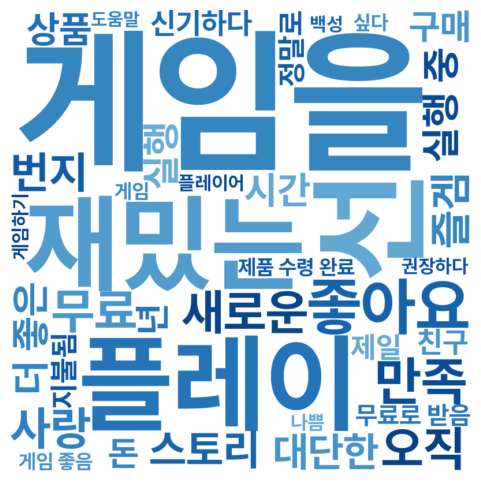

In [124]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random, matplotlib.cm as cm
from matplotlib.colors import to_hex

# Ïñ¥ÎëêÏö¥ ÌÜ§Îßå ÎΩëÎäî ÏÉâ Ìï®Ïàò Ï†ïÏùò (Blues/RedsÏùò Ïñ¥ÎëêÏö¥ Íµ¨Í∞Ñ ÏÇ¨Ïö©)
blues = cm.get_cmap("Blues")

def dark_blues(*args, **kwargs):
    return to_hex(blues(random.uniform(0.50, 0.98)))  # 0.70~0.98 Íµ¨Í∞ÑÎßå ÏÇ¨Ïö©(Îçî ÏßÑÌï®)

# Ìè∞Ìä∏ Í≤ΩÎ°ú (ÌïúÍ∏Ä ÌëúÏãú ÌïÑÏàò)
fontpath='C:/Users/user/Desktop/fonts/Pretendard-Bold.ttf'


# freq ÎîïÏÖîÎÑàÎ¶¨ ÎßåÎì§Í∏∞
freq_dict = dict(zip(pos_df_kw["keyword_ko"][:40], pos_df_kw["tfidf_mean"][:40]))

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wc = WordCloud(
    font_path=fontpath,
    width=800,
    height=800,
    background_color="white",
    color_func=dark_blues,
    collocations=False,
    relative_scaling=0.6,
    margin=0
).generate_from_frequencies(freq_dict)

# Ï∂úÎ†•
plt.figure(figsize=(6 ,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [126]:
neg_df_kw[:50]

keyword_en                                 keyword_ko  tfidf_mean
0         game                                        Í≤åÏûÑÏùÑ    0.048463
1          bad                                         ÎÇòÏÅ®    0.021914
2         play                                        ÌîåÎ†àÏù¥    0.020202
3          don                                          Îèà    0.015161
4         just                                         Ïò§ÏßÅ    0.015151
5          new                                          ÏÉà    0.015073
6       bungie                                         Î≤ôÍ∏∞    0.014721
7         shit                                         ÏóºÎ≥ë    0.014446
8      content                                         ÎßåÏ°±    0.013875
9      destiny                                   taewanmi    0.013614
10        time                                         ÏãúÍ∞Ñ    0.013212
11        hate                                         Ï¶ùÏò§    0.012902
12         ass                                         ÎÇòÍ∑Ä    0.012476
13        like                                        Ï¢ãÏïÑÏöî    0.011657
14         fun                                        Ïû¨Î∞åÎäî    0.011211
15        good                                          ÏÑ†    0.011016
16         dlc                                        DLC    0.010031
17        dont                                        Í±∞ÎãàÍπå    0.009998
18       worst                                         ÏµúÏïÖ    0.009622
19     playing                                       Ïû¨ÏÉù Ï§ë    0.009501
20       sucks                                     ÏßúÏ¶ùÎÇòÎÑ§Ïöî‚Ä¶    0.008650
21     players                                       ÌîåÎ†àÏù¥Ïñ¥    0.008283
22       money                                          Îèà    0.008108
23       years                                          ÎÖÑ    0.007582
24          10                                         10    0.007492
25       hours                                         ÏãúÍ∞Ñ    0.007075
26       worse                                       Îçî ÎÇòÏÅ®    0.006990
27        want                                         Ïã∂Îã§    0.006847
28      player                                         ÏÑ†Ïàò    0.006769
29      played                                         Ïû¨ÏÉù    0.006681
30      really                                        Ï†ïÎßêÎ°ú    0.006676
31   play game                                       Í≤åÏûÑÌïòÍ∏∞    0.006564
32       story                                 Ï∏µ (cheung)    0.006481
33       grind                                         Í∞àÍ∏∞    0.006346
34   hate game                                      ÌòêÏò§ Í≤åÏûÑ    0.006346
35    don play                                   don play    0.006339
36      people                                         Î∞±ÏÑ±    0.006262
37  game sucks                                      Í≤åÏûÑ ÏßúÏ¶ù    0.006146
38       games                                         Í≤åÏûÑ    0.006118
39        year                                         ÎÖÑÎèÑ    0.006007
40          ve                                         VE    0.005873
41     company                                         Í∏∞ÏóÖ    0.005811
42   expansion                                  Expansion    0.005748
43        life                                         Ïù∏ÏÉù    0.005661
44      boring                                       ÏßÄÍ≤®ÏõåÏöî    0.005647
45      update                                       ÏóÖÎç∞Ïù¥Ìä∏    0.005616
46         buy                                         Íµ¨Îß§    0.005592
47        make  gcc (Í∞ÄÍ∏âÏ†Å gccÎ•º Ï∂îÏ≤úÌïòÏßÄÎßå Îã§Î•∏ C Ïª¥ÌååÏùºÎü¨ÎèÑ ÎèôÏûëÌïòÍ∏∞Îäî ÌïúÎã§.)    0.005571
48         die                                nandigabiwo    0.005560
49   recommend                                       Í∂åÏû•ÌïòÎã§    0.005528

In [127]:
neg_df_kw = neg_df_kw.drop([3, 9, 16, 17, 24, 35, 40, 42, 47]).reset_index(drop=True) # Î≤àÏó≠Ïù¥ ÏïàÎêòÏñ¥ÏÑú ÎìúÎûç

In [128]:
neg_df_kw[:50]

keyword_en   keyword_ko  tfidf_mean
0         game          Í≤åÏûÑÏùÑ    0.048463
1          bad           ÎÇòÏÅ®    0.021914
2         play          ÌîåÎ†àÏù¥    0.020202
3         just           Ïò§ÏßÅ    0.015151
4          new            ÏÉà    0.015073
5       bungie           Î≤ôÍ∏∞    0.014721
6         shit           ÏóºÎ≥ë    0.014446
7      content           ÎßåÏ°±    0.013875
8         time           ÏãúÍ∞Ñ    0.013212
9         hate           Ï¶ùÏò§    0.012902
10         ass           ÎÇòÍ∑Ä    0.012476
11        like          Ï¢ãÏïÑÏöî    0.011657
12         fun          Ïû¨Î∞åÎäî    0.011211
13        good            ÏÑ†    0.011016
14       worst           ÏµúÏïÖ    0.009622
15     playing         Ïû¨ÏÉù Ï§ë    0.009501
16       sucks       ÏßúÏ¶ùÎÇòÎÑ§Ïöî‚Ä¶    0.008650
17     players         ÌîåÎ†àÏù¥Ïñ¥    0.008283
18       money            Îèà    0.008108
19       years            ÎÖÑ    0.007582
20       hours           ÏãúÍ∞Ñ    0.007075
21       worse         Îçî ÎÇòÏÅ®    0.006990
22        want           Ïã∂Îã§    0.006847
23      player           ÏÑ†Ïàò    0.006769
24      played           Ïû¨ÏÉù    0.006681
25      really          Ï†ïÎßêÎ°ú    0.006676
26   play game         Í≤åÏûÑÌïòÍ∏∞    0.006564
27       story   Ï∏µ (cheung)    0.006481
28       grind           Í∞àÍ∏∞    0.006346
29   hate game        ÌòêÏò§ Í≤åÏûÑ    0.006346
30      people           Î∞±ÏÑ±    0.006262
31  game sucks        Í≤åÏûÑ ÏßúÏ¶ù    0.006146
32       games           Í≤åÏûÑ    0.006118
33        year           ÎÖÑÎèÑ    0.006007
34     company           Í∏∞ÏóÖ    0.005811
35        life           Ïù∏ÏÉù    0.005661
36      boring         ÏßÄÍ≤®ÏõåÏöî    0.005647
37      update         ÏóÖÎç∞Ïù¥Ìä∏    0.005616
38         buy           Íµ¨Îß§    0.005592
39         die  nandigabiwo    0.005560
40   recommend         Í∂åÏû•ÌïòÎã§    0.005528
41        paid        Í≤∞Ï†ú ÏôÑÎ£å    0.005295
42       idiot          NaN    0.005278
43       greed          Ïù∏ÏÉâ     0.005151
44        lost      Í∏∏ÏùÑ ÏûÉÏñ¥Î≤ÑÎ¶º    0.005006
45         pay         Íµ¨Îß§ÌïòÍ∏∞    0.004892
46         way           Î∞©Î≤ï    0.004875
47        know            Ïïé    0.004802
48       waste   ÌèêÍ∏∞Î¨º(waste)    0.004801
49      ruined      ÎπÑÍº¨ÎäîÍ±∞ Í∞ôÎã§    0.004736

In [131]:
neg_df_kw["keyword_ko"] = neg_df_kw["keyword_ko"].replace({
    "ÏÉà": "ÏÉàÎ°úÏö¥",
    "Î≤ôÍ∏∞": "Î≤àÏßÄ",
    "ÎÇòÍ∑Ä": "Î©çÏ≤≠Ïù¥",
    "Ïû¨ÏÉù Ï§ë": "Ïã§Ìñâ Ï§ë",
    "ÏÑ†Ïàò": "ÌîåÎ†àÏù¥Ïñ¥",
    "Ï∏µ(cheung)": "Ïä§ÌÜ†Î¶¨",
    "Í∞àÍ∏∞": "ÎπªÎã§",
    "Î∞±ÏÑ±": "ÏÇ¨ÎûåÎì§",
    "nandigabiwo":"Ï£ΩÎã§"
})

C:\Users\user\AppData\Local\Temp\ipykernel_3468\440836625.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  reds  = cm.get_cmap("Reds")


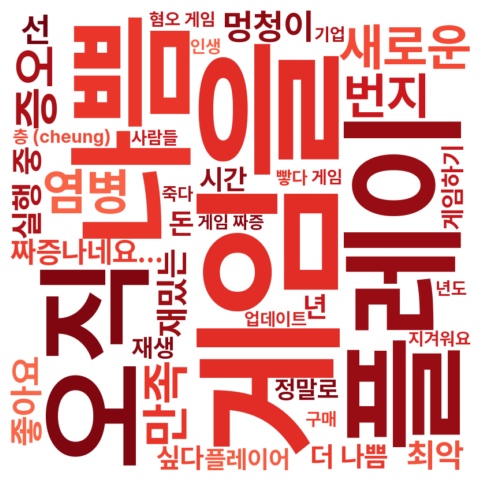

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reds  = cm.get_cmap("Reds")

def dark_reds(*args, **kwargs):
    return to_hex(reds(random.uniform(0.50, 0.98)))

# Ìè∞Ìä∏ Í≤ΩÎ°ú (ÌïúÍ∏Ä ÌëúÏãú ÌïÑÏàò)
fontpath='C:/Users/user/Desktop/fonts/Pretendard-Bold.ttf'


# freq ÎîïÏÖîÎÑàÎ¶¨ ÎßåÎì§Í∏∞
freq_dict = dict(zip(neg_df_kw["keyword_ko"][:40], neg_df_kw["tfidf_mean"][:40]))

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wc = WordCloud(
    font_path=fontpath,
    width=800,
    height=800,
    background_color="white",
    color_func=dark_reds,
    collocations=False,
    relative_scaling=0.3
).generate_from_frequencies(freq_dict)

# Ï∂úÎ†•
plt.figure(figsize=(6, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()